Loading required package: sysfonts

Loading required package: showtextdb



[1] "AAPL" "GOOG" "MSFT"

,AAPL,GOOG,MSFT
,<dbl>,<dbl>,<dbl>
Annualized Return,0.2283,0.3083,0.3081
Annualized Std Dev,0.2611,0.3004,0.2379
Annualized Sharpe (Rf=0%),0.8746,1.0263,1.2955


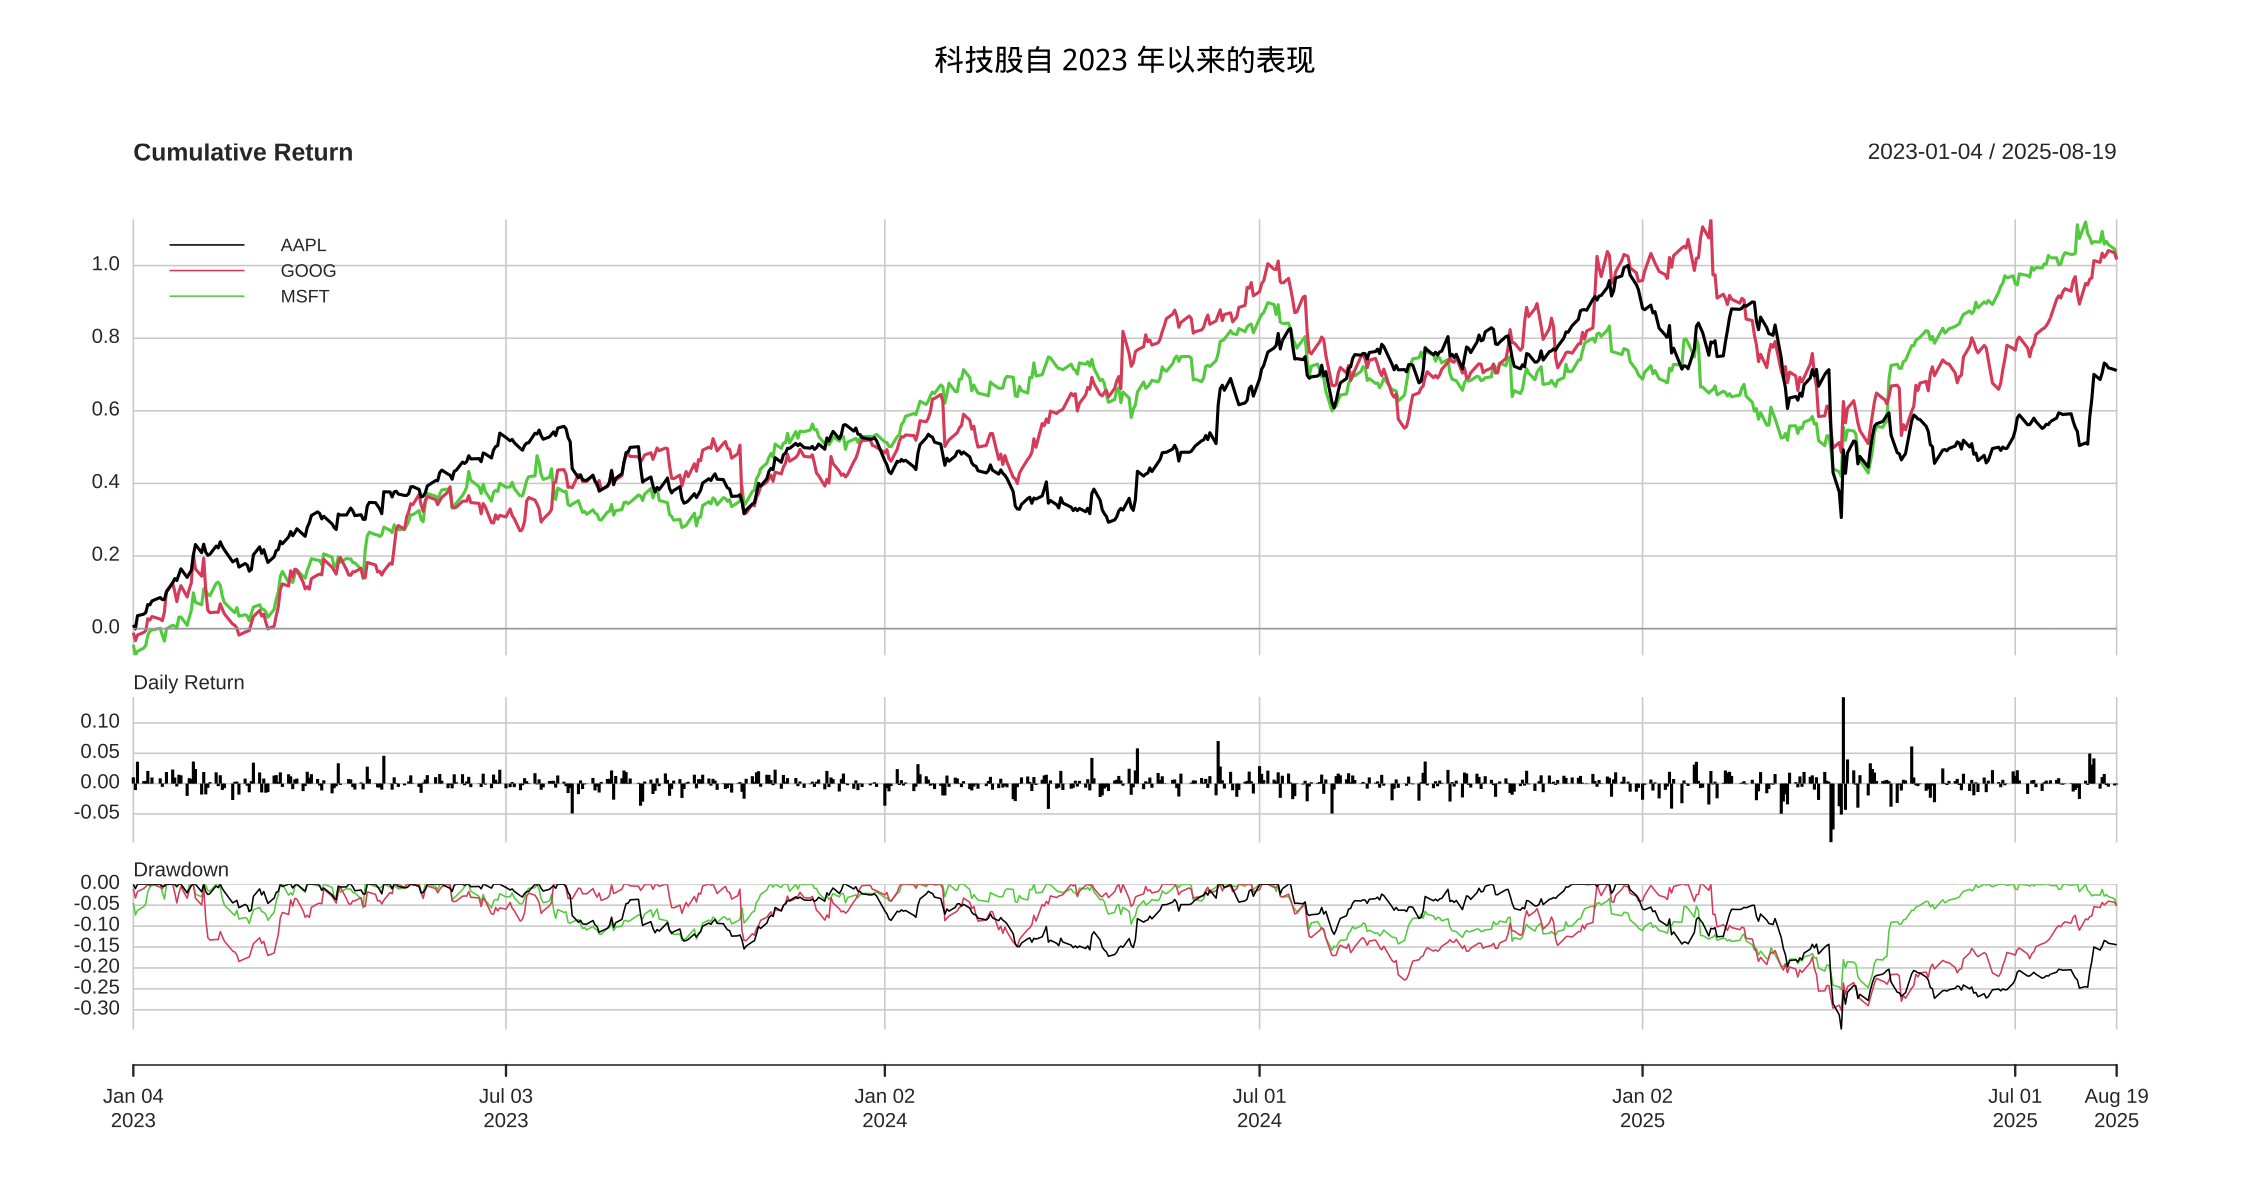

In [2]:
library(quantmod)
library(PerformanceAnalytics)
library(showtext) 

font_add_google("Noto Sans SC", "NotoSansSC")
showtext_auto()

options(repr.plot.width = 15, repr.plot.height = 8, repr.plot.res = 150)

# --- 1. 数据获取 ---
# 定义我们要分析的股票代码和时间范围
tickers <- c("AAPL", "GOOG", "MSFT")
start_date <- "2023-01-01"

# 使用 getSymbols 从雅虎财经获取数据
# getSymbols 会为每个股票代码在当前环境中创建一个 xts 对象
getSymbols(tickers, src = "yahoo", from = start_date)

# --- 2. 数据处理与计算 ---
# 将多只股票的收盘价合并到一个 xts 对象中
prices <- do.call(merge, lapply(tickers, function(x) Ad(get(x))))
colnames(prices) <- tickers

# 计算每日对数收益率
returns <- Return.calculate(prices, method = "log")
# 移除第一行的 NA 值
returns <- returns[-1, ]

# --- 3. 分析与可视化 ---
# 使用 PerformanceAnalytics 的明星函数来创建一张综合性能图表
# 这张图包含了累计收益率、每日收益率和最大回撤
charts.PerformanceSummary(
  returns,
  main = "科技股自 2023 年以来的表现",
  geometric = TRUE # 使用几何平均（对数收益率适用）
)

# 计算并打印一些关键的年度性能指标
table.AnnualizedReturns(returns, scale = 252) # scale=252 表示 ~252 个交易日/年

[1] "AAPL" "GOOG" "MSFT"

[1] "年化夏普比率:"
                                     AAPL     GOOG     MSFT
Annualized Sharpe Ratio (Rf=0%) 0.8745867 1.026334 1.295467
[1] "最大回撤:"
                    AAPL      GOOG      MSFT
Worst Drawdown 0.3471096 0.3017353 0.2524041
[1] "95% 修正 VaR (日度):"
           AAPL        GOOG       MSFT
VaR -0.01983852 -0.02963212 -0.0205103


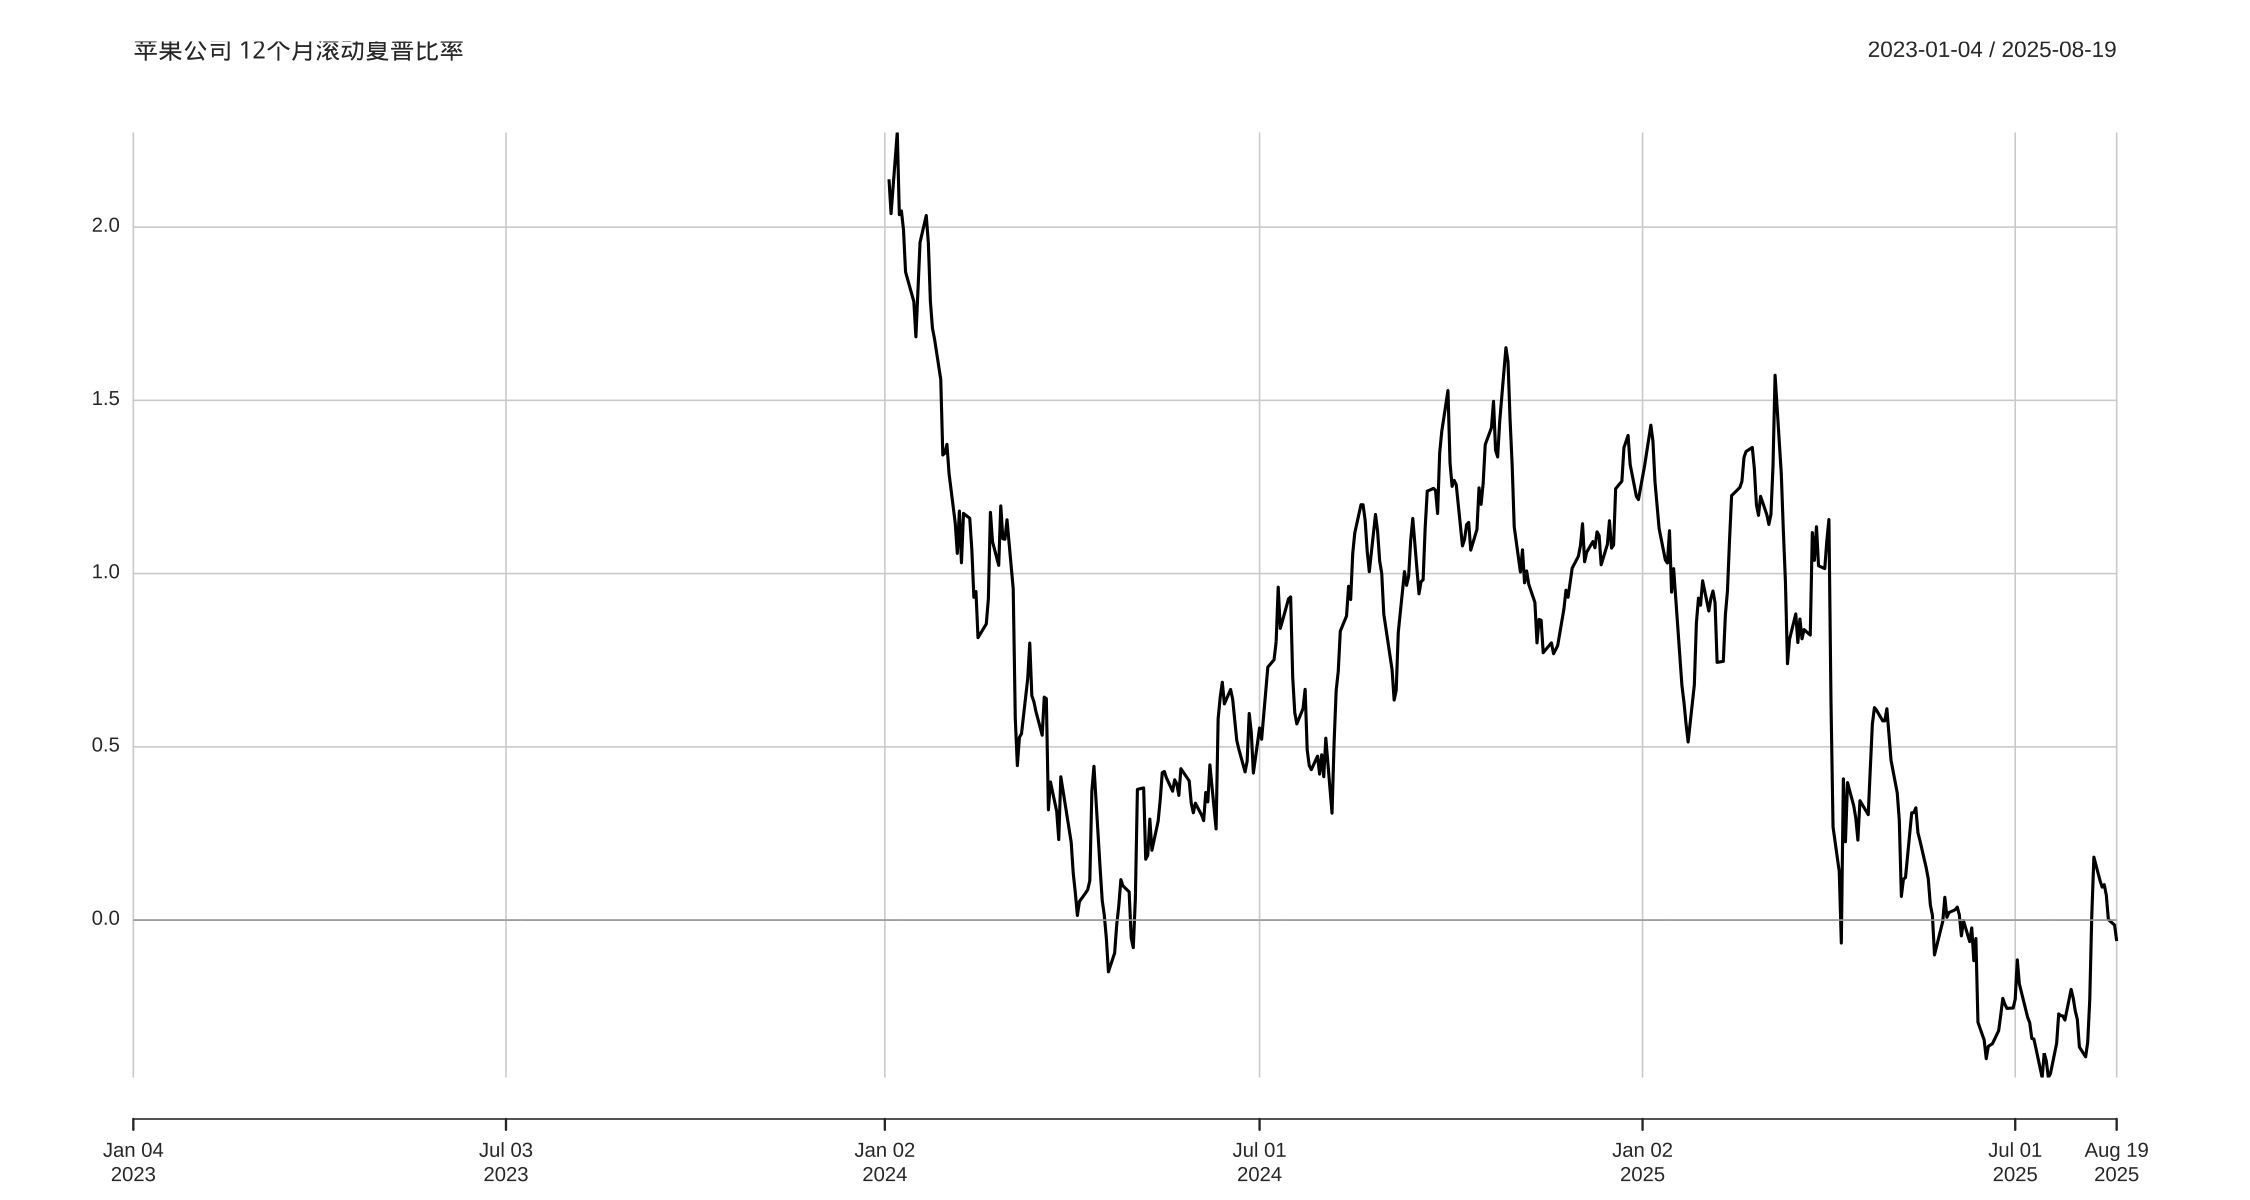

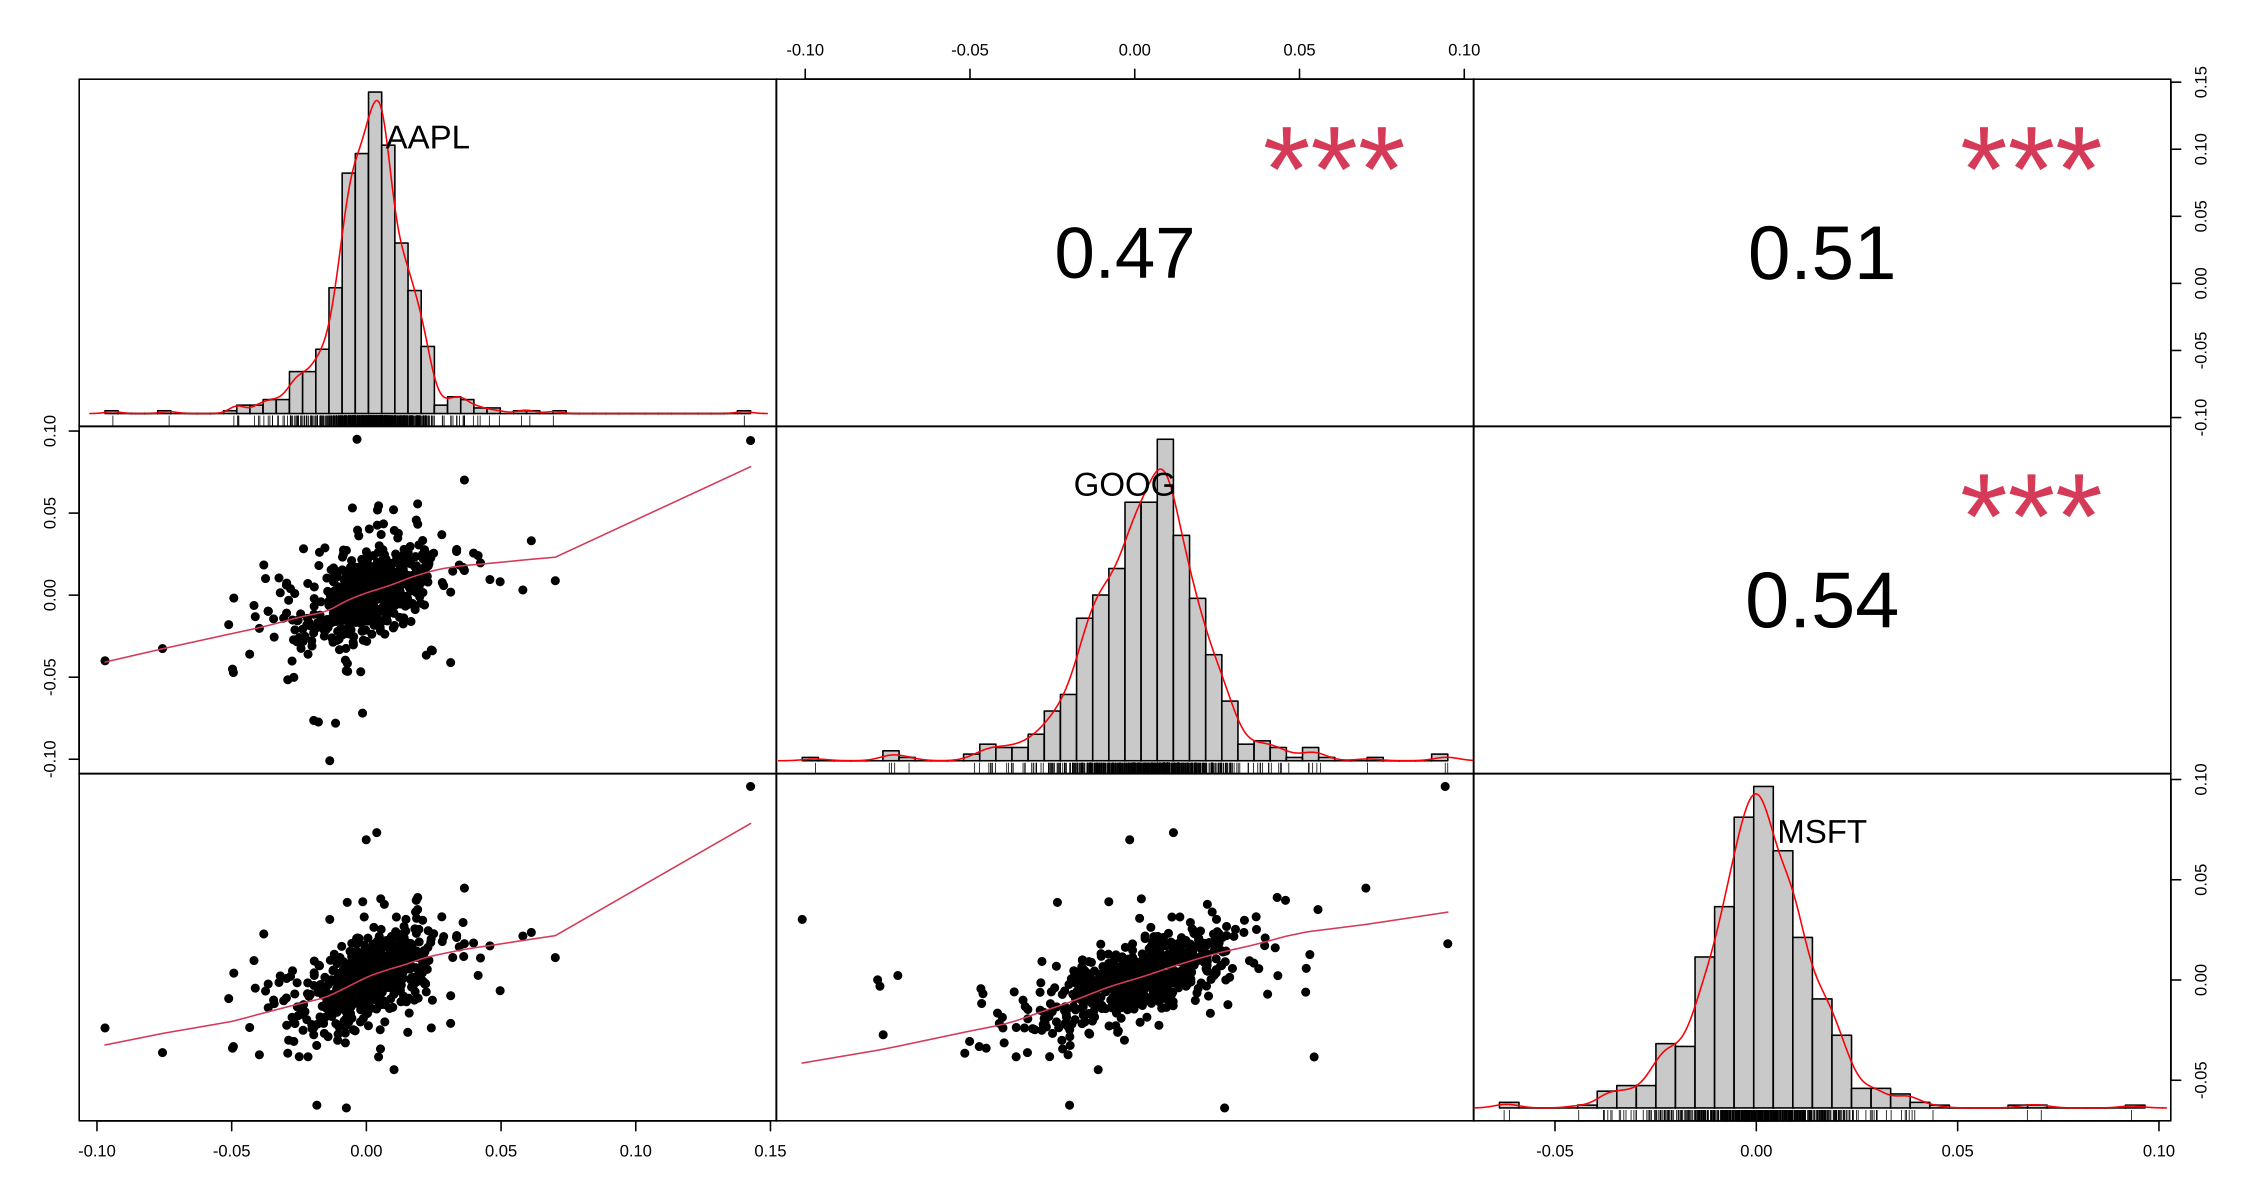

In [3]:
# 确保已经安装和加载了库
# install.packages(c("quantmod", "PerformanceAnalytics"))
library(quantmod)
library(PerformanceAnalytics)

# --- 沿用之前的数据 ---
tickers <- c("AAPL", "GOOG", "MSFT")
start_date <- "2023-01-01"
getSymbols(tickers, src = "yahoo", from = start_date)

prices <- do.call(merge, lapply(tickers, function(x) Ad(get(x))))
colnames(prices) <- tickers
returns <- Return.calculate(prices, method = "log")[-1, ]

# --- 1. 计算具体的性能和风险指标 ---

# 计算年化的夏普比率（假设无风险利率为0）
sharpe_ratios <- SharpeRatio.annualized(returns, Rf = 0, scale = 252)
print("年化夏普比率:")
print(sharpe_ratios)

# 计算最大回撤
max_drawdowns <- maxDrawdown(returns)
print("最大回撤:")
print(max_drawdowns)

# 计算 95% 置信水平的修正 VaR (Modified VaR)
# 修正VaR考虑了偏度和峰度，更适合金融时间序列
modified_var <- VaR(returns, p = 0.95, method = "modified")
print("95% 修正 VaR (日度):")
print(modified_var)

# --- 2. 绘制更专业的图表 ---

# 绘制 12个月（约252天）滚动夏普比率
# 这能帮我们看到在不同市场环境下，资产的风险调整后收益表现如何
chart.RollingPerformance(
  R = returns[, "AAPL"], # 以苹果公司为例
  width = 252,
  FUN = "SharpeRatio.annualized",
  scale = 252,
  main = "苹果公司 12个月滚动夏普比率"
)

# 绘制三只股票收益率的相关性矩阵图
chart.Correlation(
  returns,
  histogram = TRUE, # 在对角线上显示收益率分布直方图
  pch = 19 # pch 是散点图的点的样式
)